# Python-in-the-lab: introduction to the classes I

In [2]:
import os
import numpy as np
import scipy.integrate as integrate
import matplotlib.pylab as plt
%matplotlib inline

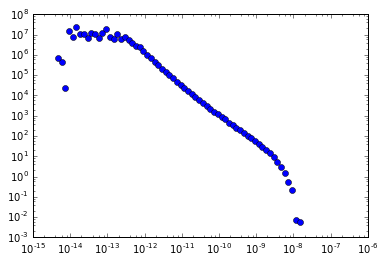

In [3]:
mainDir = "/home/gf/src/Python/Python-in-the-lab/Bk"
# Today we concentrate on a different set of data
filename = "F64ac_0.01_S.dat"
# These are distributions of sizes
filename = os.path.join(mainDir, filename)
s, ps = np.loadtxt(filename, comments="#", unpack=True)
plt.loglog(s, ps, 'o');

### We would like to work a little with the data

The idea is the following:

Can we construction something general and sufficiently abstract from which we can extract the values more easily?

In [4]:
# Your first class
class Sdist:
    def __init__(self, filename):
        self.size, self.ps = np.loadtxt(filename, comments="#", unpack=True)

filename = "F64ac_0.01_S.dat"
filename = os.path.join(mainDir, filename)
s001 = Sdist(filename)
# What is "self" ???

In [9]:
# Let's redifine the class
# as I want to get rid of the zeros of ps
class Sdist:
    def __init__(self, filename):
        self.size, self.ps = np.loadtxt(filename, comments="#", unpack=True)
        s_len = len(self.size)
        self.size, self.ps = self.find_not_zeros()
        print("%i lines deleted" % (s_len - len(self.size)))
    
    def find_not_zeros(self):
        is_not_zero = self.ps != 0
        s = self.size[is_not_zero]
        ps = self.ps[is_not_zero]
        return s, ps

14 lines deleted


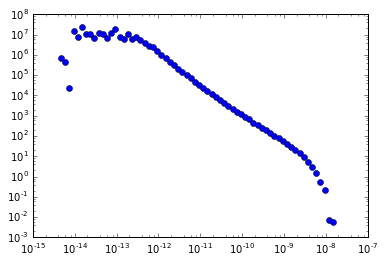

In [10]:
S001 = Sdist(filename)
plt.loglog(S001.size, S001.ps, 'o');

### Why don't we give just the frequency, so it takes care of all the rest?

In [65]:
# Let's redifine the class
# I want to get rid of the zeros of ps
class Sdist:
    def __init__(self, freq, mainDir):
        filename = "F64ac_%s_S.dat" % freq
        filename = os.path.join(mainDir, filename)
        self.s, self.ps = np.loadtxt(filename, comments="#", unpack=True)
        s_len = len(self.s)
        self.s, self.ps = self.find_not_zeros()
        print("%i lines deleted" % (s_len - len(self.s)))
    
    def find_not_zeros(self):
        is_not_zero = self.ps != 0
        s = self.s[is_not_zero]
        ps = self.ps[is_not_zero]
        return s, ps

14 lines deleted


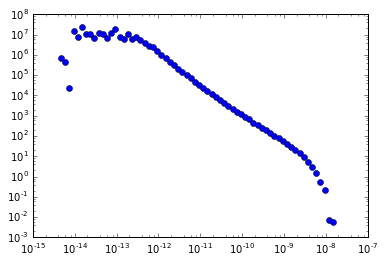

In [66]:
S001 = Sdist(0.01, mainDir)
plt.loglog(S001.s, S001.ps, 'o');

In [69]:
# Can we now do it for the 3 frequencies?
freqs = np.arange(1,4) / 100
# Can I make a dictionary?
s_distributions = dict()
for freq in freqs:
    s_distributions[freq] = Sdist(freq, mainDir)

s_distributions

14 lines deleted
12 lines deleted
14 lines deleted


{0.01: <__main__.Sdist at 0x7f569e3ccf28>,
 0.02: <__main__.Sdist at 0x7f569e3ccba8>,
 0.029999999999999999: <__main__.Sdist at 0x7f569e3cca58>}

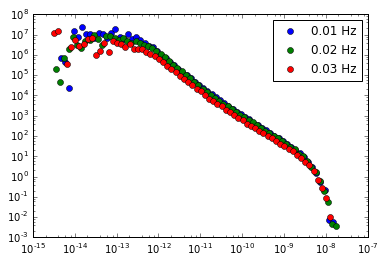

In [77]:
for freq in freqs:
    sd = s_distributions[freq]
    label = "%.2f Hz" % freq
    plt.loglog(sd.s, sd.ps, 'o', label=label)
plt.legend(numpoints=1); 

In [78]:
# What is s001???
s001
# s001 is an INSTANCE of the class

### Ok, ok, but this not so general enough!
#### I do not remember the frequencies, and I am interested in the files ending with S, T, u, v. Can we do something more general? 

In [97]:
# Let's redifine the class
# in more general terms
import glob, os, sys

class Dist:
    def __init__(self, dist_type, mainDir):
        self.mainDir = mainDir
        # Check if the dist_type exists
        # How can we do it?
        dis_types = self.get_distribution_types()
        print(dis_types)
        if dist_type not in dis_types:
            print("Type %s does not exist. Exit" % dist_type)
            sys.exit()
        filename = "F64ac_%s_S.dat" % (freq
        filename = os.path.join(mainDir, filename)
        self.s, self.ps = np.loadtxt(filename, comments="#", unpack=True)
        s_len = len(self.s)
        self.s, self.ps = self.find_not_zeros()
        print("%i lines deleted" % (s_len - len(self.s)))
    
    def find_not_zeros(self):
        is_not_zero = self.ps != 0
        s = self.s[is_not_zero]
        ps = self.ps[is_not_zero]
        return s, ps
    
    def get_distribution_types(self, maxlen=1):
        filenames = glob.glob(os.path.join(self.mainDir, "*.dat"))
        filenames = [os.path.splitext(filename)[0] for filename in filenames]
        filenames = [filename.split("_", 2)[2] for filename in filenames]
        dis_types = [filename for filename in filenames if len(filename) <= maxlen]
        dis_types = set(dis_types)
        return dis_types

In [100]:
d_T = Dist("T", mainDir)
d_S = Dist("S", mainDir)

{'E', 'v', 'T', 'S'}
14 lines deleted
{'E', 'v', 'T', 'S'}
14 lines deleted


## Introduction to classes

In [3]:
# Introduction to classes
class Shape: # Note the Capital
    def __init__(self,y,x): # Initialization
        self.x = x
        self.y = y
        self.norm = integrate.trapz(y,x)
    
    def y_norm(self):
        return self.y/self.norm

In [4]:
s1 = Shape(shapes[0.000159],time)

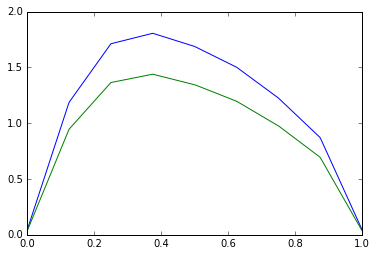

In [5]:
plt.plot(s1.x, s1.y, s1.x, s1.y_norm())

In [8]:
# Introduction to classes: your first (and only) decorator
class Shape: # Note the Capital
    def __init__(self,y,x): # Initialization
        self.x = x
        self.y = y
        self.norm = integrate.trapz(y,x)
    
    @property
    def y_norm(self):
        return self.y/self.norm

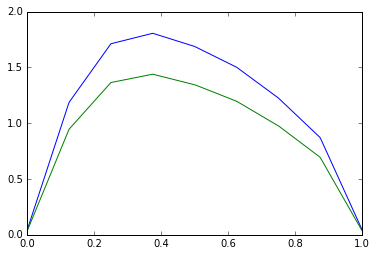

In [9]:
s1 = Shape(shapes[0.000159],time)
plt.plot(s1.x, s1.y, s1.x, s1.y_norm)

In [12]:
# To keep the order of the keys
from collections import OrderedDict
dictShapes = OrderedDict()

for i,size in enumerate(sizes):
    dictShapes[size] = Shape(data[:,i+1], time) # What is this? A dictionary of clasess??

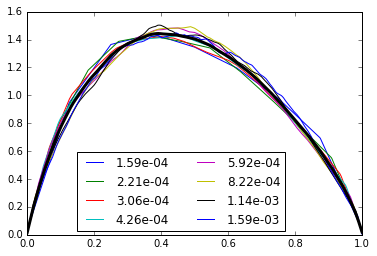

In [13]:
average = 0
for size in dictShapes:
    s = dictShapes[size]
    label = "{0:.2e}".format(size)
    plt.plot(s.x, s.y_norm, label=label)
    average += s.y_norm
average /= len(dictShapes)
plt.plot(time, average,'k',lw=3)
plt.legend(loc=(.15,.015),ncol=2);

### Classes can redefine operations

In [32]:
class Rectangle:
    """
    This class defines operations on Rectangles
    """
    def __init__(self, base, height):
        self.base = base
        self.height = height
        self.area = base * height
        self.p = self._get_perim()
        self._diagonal = (base*base + height * height)**0.5 
    
    def _get_perim(self, half=False):
        """
        Get the perimeter of the Rectange
        Parameters:
        ----------
        half: Bool.
             If True, get the semiperimeter
        """
        p = self.base + self.height
        if half:
            return p
        else:
            return 2 * p
        
    def print_perimeter(self):
        return "The perimeter is %f" % self.p
    
    def __add__(self, other):
        base = self.base + other.base
        height = self.height + other.height
        return Rectangle(base,height)
    
    def __repr__(self):
        return "Rectangle of {0} by {1}".format(self.base, self.height)

p0 = Rectangle(3,2)
p1 = Rectangle(1,1)
p2 = Rectangle(2,0.5)

In [33]:
print p0.base, p0.height, p0.p, p0.area
p0.print_perimeter()

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-33-53d23a1eb001>, line 1)

In [ ]:
# Construct a larger Rectange
p3 = p0 + p1
print p3.base, p3.height, p3.p, p3.area

In [ ]:
p3